In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from imblearn.combine import SMOTEENN
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import LinearSVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Xccelerate/Project/project 2/weatherAUS.csv')

In [4]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.month
df['Month']

0         12
1         12
2         12
3         12
4         12
          ..
145455     6
145456     6
145457     6
145458     6
145459     6
Name: Month, Length: 145460, dtype: int64

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,6.399615
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,3.427262
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,3.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,6.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,9.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,12.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 <a list of 17 Text major ticklabel objects>)

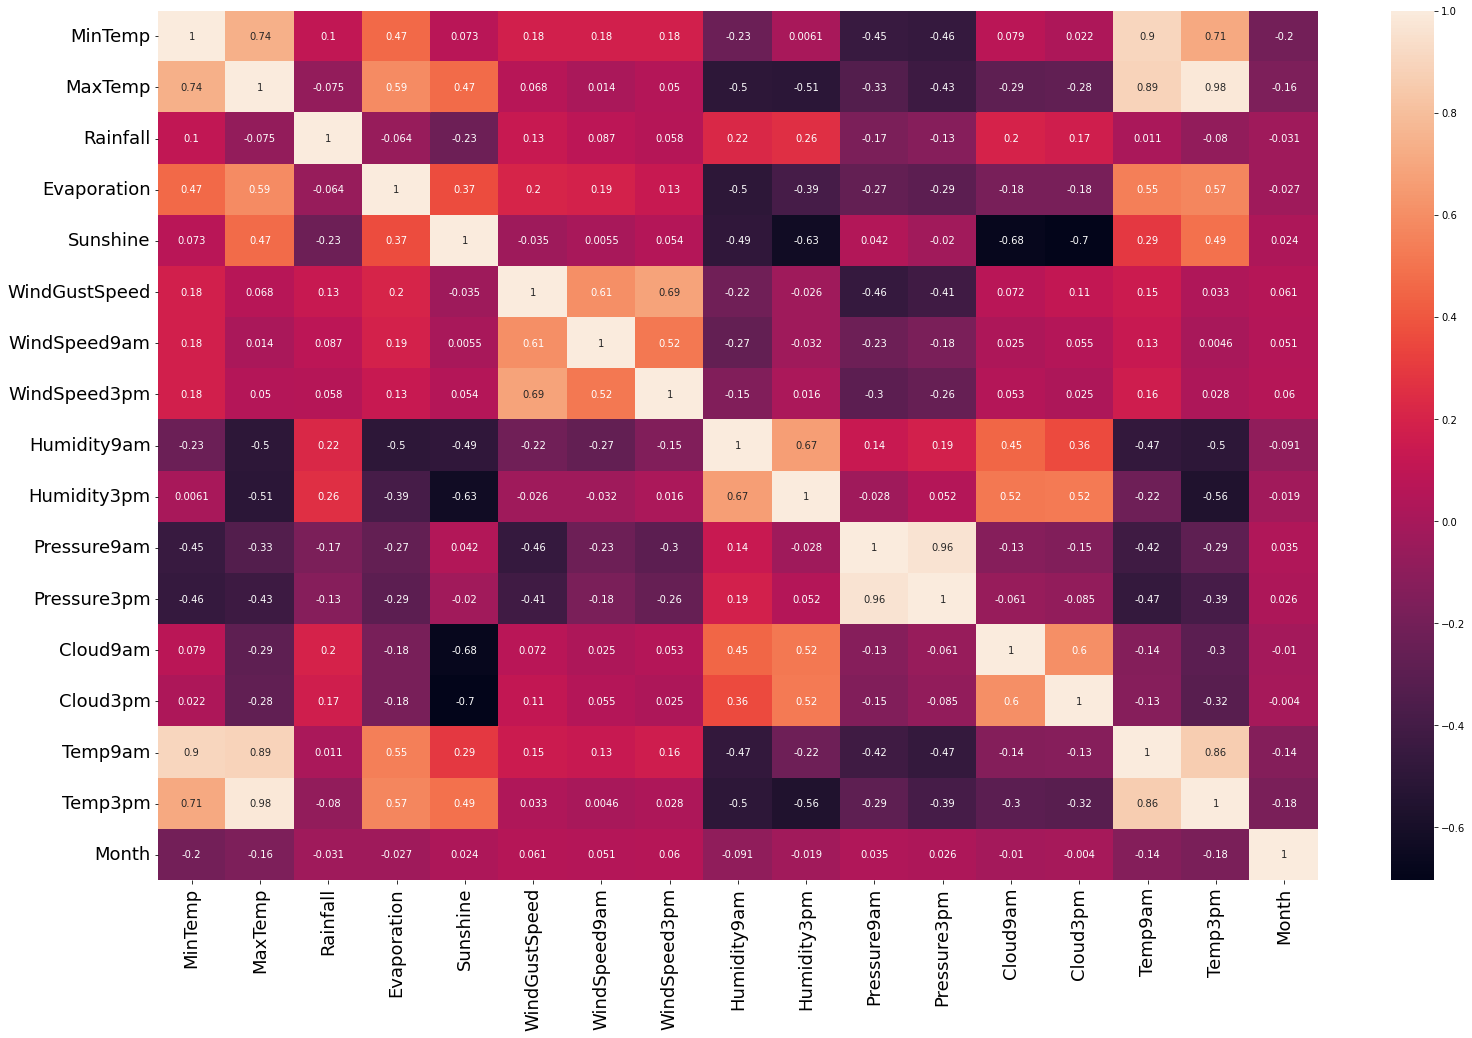

In [8]:
plt.figure(figsize=(26,16))
sns.heatmap(df.corr(),annot=True)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

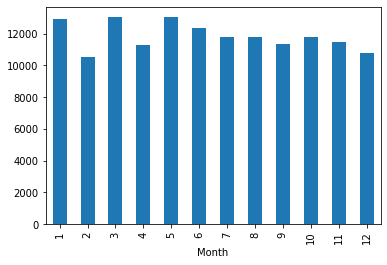

In [9]:
df.groupby('Month')['RainTomorrow'].count().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


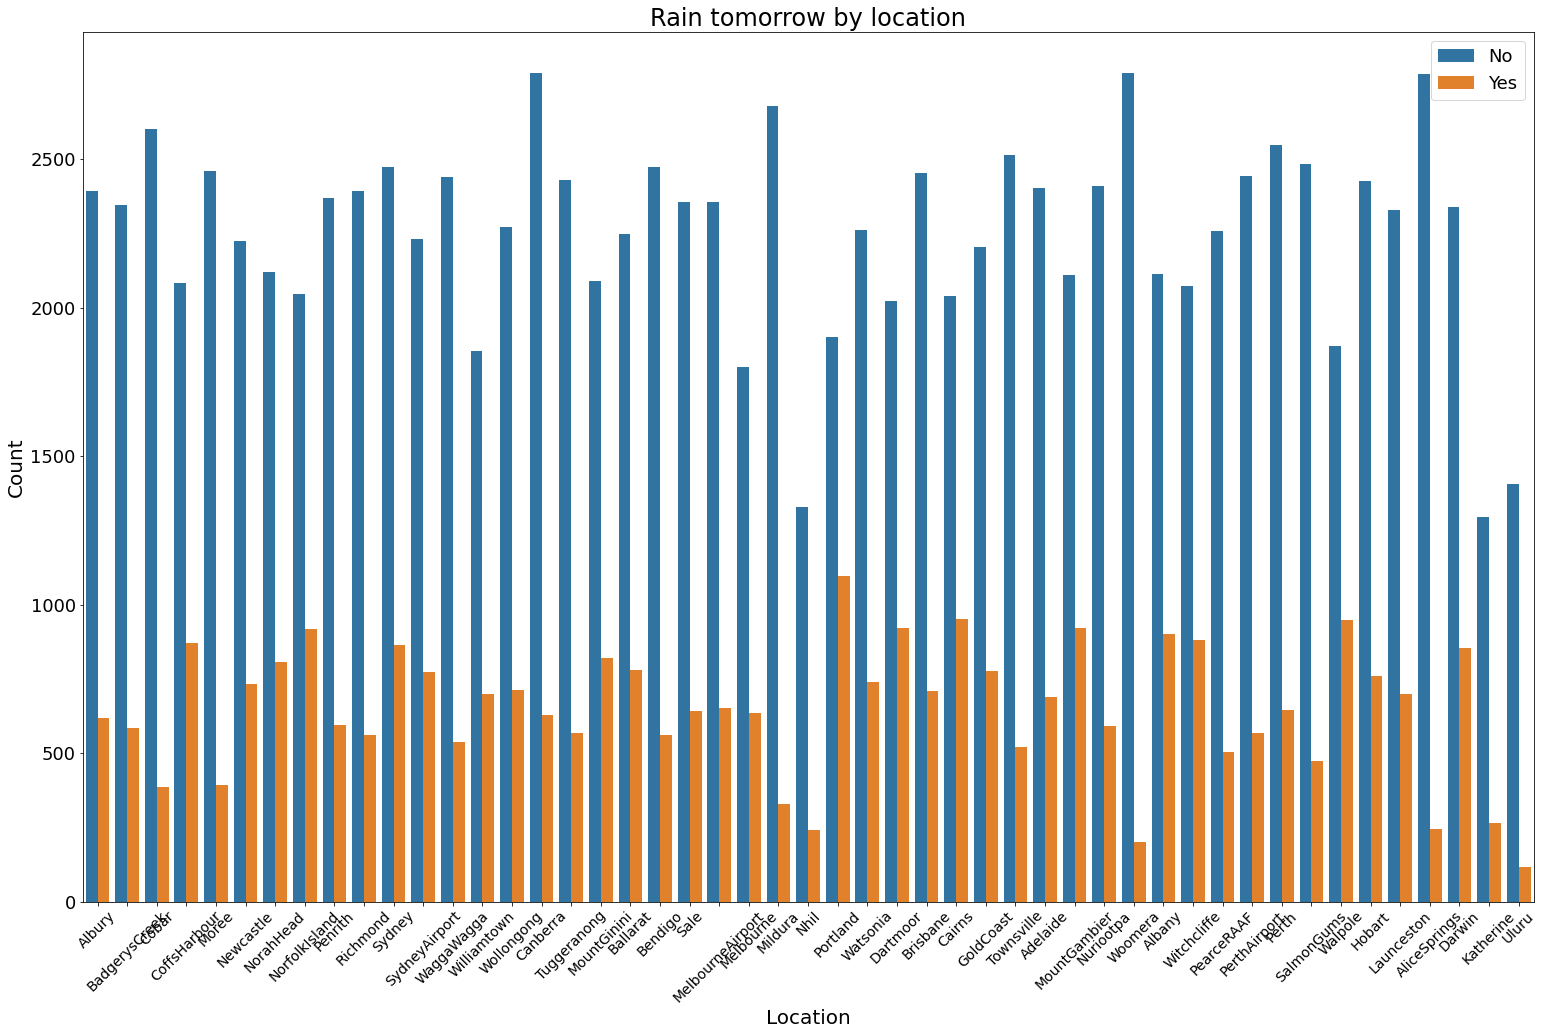

In [10]:
plt.figure(figsize=(26,16))
sns.countplot(df['Location'],hue=df['RainTomorrow'])
plt.title('Rain tomorrow by location',fontsize=24)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=18)
plt.xlabel('Location',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.legend(fontsize=18)

# Null data

In [11]:
print('Number of null value:')
print(df.isnull().sum())
print('\n')
print('Percentage of null value:')
print(df.isnull().sum()/len(df)*100)

Number of null value:
Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Month                0
dtype: int64


Percentage of null value:
Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidit

In [12]:
df.drop(labels=['Temp9am','Temp3pm','Pressure3pm'],axis=1,inplace=True) # columns with high correlation

In [13]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,8.0,NaN,No,No,12
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,NaN,NaN,No,No,12
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,NaN,2.0,No,No,12
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,NaN,NaN,No,No,12
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,7.0,8.0,No,No,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,NaN,NaN,No,No,6
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,NaN,NaN,No,No,6
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,NaN,NaN,No,No,6
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,3.0,2.0,No,No,6


In [14]:
#Create categorical data and numerical data lists
cat_data=[]
num_data=[]
for i in df.columns:
    if df[i].dtypes=='float64':
        num_data.append(i)
    elif df[i].dtypes=='object':
        cat_data.append(i)
print('List of numerical data:')
print(num_data)
print('\n')
print('List of categorical data:')
print(cat_data)

List of numerical data:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm']


List of categorical data:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [15]:
#fill missing numerical data with mean by month
#fill missing categorical data with mode by month
#drop the data that contains missing value in target 'RainTomorrow' and column 'RainToday'
for i,j in df.isnull().sum().items():
    if j>0:
        if i in num_data:
            df[i]=df[i].fillna(df.groupby('Month')[i].transform('mean'))
        elif i in cat_data[:4]:
            df[i]=df[i].fillna(df.groupby('Month')[i].transform(lambda x: x.value_counts().idxmax()))
        elif i in cat_data[4:6]:
            df.dropna(axis=0,inplace=True, subset=[i])

In [16]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Month
0,2008-12-01,Albury,13.4,22.9,0.6,8.076262,8.997794,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,8.000000,4.517149,No,No,12
1,2008-12-02,Albury,7.4,25.1,0.0,8.076262,8.997794,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,4.667516,4.517149,No,No,12
2,2008-12-03,Albury,12.9,25.7,0.0,8.076262,8.997794,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,4.667516,2.000000,No,No,12
3,2008-12-04,Albury,9.2,28.0,0.0,8.076262,8.997794,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,4.667516,4.517149,No,No,12
4,2008-12-05,Albury,17.5,32.3,1.0,8.076262,8.997794,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,7.000000,8.000000,No,No,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,2.512956,5.645576,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,4.744507,4.897285,No,No,6
145455,2017-06-21,Uluru,2.8,23.4,0.0,2.512956,5.645576,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,4.744507,4.897285,No,No,6
145456,2017-06-22,Uluru,3.6,25.3,0.0,2.512956,5.645576,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,4.744507,4.897285,No,No,6
145457,2017-06-23,Uluru,5.4,26.9,0.0,2.512956,5.645576,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,4.744507,4.897285,No,No,6


In [17]:
df.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Cloud9am         False
Cloud3pm         False
RainToday        False
RainTomorrow     False
Month            False
dtype: bool

# Label encoder/ get dummies

In [18]:
df['RainTomorrow']=df['RainTomorrow'].map({'Yes':1,'No':0})
df['RainToday']=df['RainToday'].map({'Yes':1,'No':0})

In [19]:
for i in cat_data[0:4]:
    cat_col=pd.get_dummies(df[i],drop_first=True)
    df=pd.concat([df,cat_col],axis=1)
    df=df.drop(i,axis=1)

In [20]:
df

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Month,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,2008-12-01,13.4,22.9,0.6,8.076262,8.997794,44.0,20.0,24.0,71.0,22.0,1007.7,8.000000,4.517149,0,0,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2008-12-02,7.4,25.1,0.0,8.076262,8.997794,44.0,4.0,22.0,44.0,25.0,1010.6,4.667516,4.517149,0,0,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2008-12-03,12.9,25.7,0.0,8.076262,8.997794,46.0,19.0,26.0,38.0,30.0,1007.6,4.667516,2.000000,0,0,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,9.2,28.0,0.0,8.076262,8.997794,24.0,11.0,9.0,45.0,16.0,1017.6,4.667516,4.517149,0,0,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,17.5,32.3,1.0,8.076262,8.997794,41.0,7.0,20.0,82.0,33.0,1010.8,7.000000,8.000000,0,0,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,3.5,21.8,0.0,2.512956,5.645576,31.0,15.0,13.0,59.0,27.0,1024.7,4.744507,4.897285,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145455,2017-06-21,2.8,23.4,0.0,2.512956,5.645576,31.0,13.0,11.0,51.0,24.0,1024.6,4.744507,4.897285,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145456,2017-06-22,3.6,25.3,0.0,2.512956,5.645576,22.0,13.0,9.0,56.0,21.0,1023.5,4.744507,4.897285,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
145457,2017-06-23,5.4,26.9,0.0,2.512956,5.645576,37.0,9.0,9.0,53.0,24.0,1021.0,4.744507,4.897285,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# SMOTEENN

In [21]:
df['RainTomorrow'].value_counts()

0    109586
1     31201
Name: RainTomorrow, dtype: int64

In [22]:
X=df.drop(['RainTomorrow','Date'],axis=1)
y=df['RainTomorrow']

In [23]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X.values,y.ravel())

KeyboardInterrupt: ignored

In [ ]:
print(X_resampled)
print(y_resampled)
print(y_resampled.value_counts())

[[13.4        22.9         0.6        ...  0.          1.
   0.        ]
 [12.9        25.7         0.         ...  0.          0.
   1.        ]
 [ 9.2        28.          0.         ...  0.          0.
   0.        ]
 ...
 [12.41040354 21.61921505  0.         ...  0.          0.77600885
   0.        ]
 [11.85122173 15.67561086  6.94268667 ...  0.          0.
   0.        ]
 [24.04851357 31.51671349  0.         ...  0.          0.
   0.        ]]
[0 0 0 ... 1 1 1]


# Standard Scaling

In [ ]:
sc=StandardScaler()
x=sc.fit_transform(X_resampled)

In [ ]:
x.shape

(169018, 108)

# Train Test Split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y_resampled,test_size=0.2,random_state=42)

# Logistics regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels,predictions)
    report = classification_report(test_labels,predictions)
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print(report)
    return 

In [ ]:
evaluate(classifier, X_test, y_test)

Model Performance
Accuracy = 0.87%.
              precision    recall  f1-score   support

           0       0.84      0.85      0.84     13418
           1       0.90      0.89      0.90     20386

    accuracy                           0.87     33804
   macro avg       0.87      0.87      0.87     33804
weighted avg       0.87      0.87      0.87     33804



# KNN

In [ ]:
k_range = range(1,10)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [ ]:
knnmodel = KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_train,y_train)

evaluate(classifier, X_test, y_test)

Model Performance
Accuracy = 0.87%.
              precision    recall  f1-score   support

           0       0.84      0.85      0.84     13418
           1       0.90      0.89      0.90     20386

    accuracy                           0.87     33804
   macro avg       0.87      0.87      0.87     33804
weighted avg       0.87      0.87      0.87     33804



# SVM

In [ ]:
model = SVC(max_iter=500)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVC(max_iter=500)

In [ ]:
evaluate(classifier, X_test, y_test)

Model Performance
Accuracy = 0.87%.
              precision    recall  f1-score   support

           0       0.84      0.85      0.84     13418
           1       0.90      0.89      0.90     20386

    accuracy                           0.87     33804
   macro avg       0.87      0.87      0.87     33804
weighted avg       0.87      0.87      0.87     33804



# Random Forest

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=500,n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

evaluate(rnd_clf, X_test, y_test)

Model Performance
Accuracy = 0.96%.
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     13418
           1       0.97      0.96      0.97     20386

    accuracy                           0.96     33804
   macro avg       0.96      0.96      0.96     33804
weighted avg       0.96      0.96      0.96     33804



In [ ]:
score=cross_val_score(rnd_clf,X_resampled,y_resampled,cv=10,n_jobs=-1)

In [ ]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
scores_a = cross_val_score(rnd_clf,X_resampled,y_resampled, scoring='accuracy', cv=cv, n_jobs=-1)

NameError: ignored

In [ ]:
score

array([0.69157496, 0.64731984, 0.68832091, 0.75482191, 0.89658029,
       0.77712697, 0.92829251, 0.86415809, 0.7253417 , 0.91544879])

In [ ]:
score.mean()

# AdaBoost

In [ ]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=100,random_state=42)
ada_clf.fit(X_train, y_train)

evaluate(ada_clf, X_test, y_test)

Model Performance
Accuracy = 0.95%.
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     13418
           1       0.97      0.95      0.96     20386

    accuracy                           0.95     33804
   macro avg       0.94      0.95      0.95     33804
weighted avg       0.95      0.95      0.95     33804



# XGBoost

In [ ]:
xgmodel = xgboost.XGBClassifier()
xgmodel.fit(X_train, y_train)

evaluate(xgmodel, X_test, y_test)

Model Performance
Accuracy = 0.93%.
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     13418
           1       0.94      0.93      0.94     20386

    accuracy                           0.93     33804
   macro avg       0.92      0.93      0.92     33804
weighted avg       0.93      0.93      0.93     33804



# Random Forest, RandomizedSearch

In [ ]:
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# max_depth = [int(x) for x in np.linspace(10, 100, num = 5)]
# max_depth.append(None)
# min_samples_split = [2, 5]
# min_samples_leaf = [1, 2]
# bootstrap = [True, False]

# random_grid = {'n_estimators': n_estimators,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)

In [ ]:
# rf = RandomForestClassifier()
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# rf_random.fit(X_train, y_train)

In [ ]:
# best_random = rf_random.best_estimator_
# random_accuracy = evaluate(best_random, X_test, y_test)

In [ ]:
# best_random

# Random Forest Grid Search

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [90, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [8, 12],
    'n_estimators': [200, 500]
}

In [ ]:
rf_gd = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf_gd, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 32 candidates, totalling 96 fits


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 500}

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_train, y_train)

Model Performance
Accuracy = 0.96%.
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     54182
           1       0.97      0.96      0.97     81032

    accuracy                           0.96    135214
   macro avg       0.96      0.96      0.96    135214
weighted avg       0.96      0.96      0.96    135214

